In [68]:
from dotenv import load_dotenv
from scipy.special import softmax
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt
import os
import pandas as pd
import re 
import tweepy 
load_dotenv()

True

API authenticatoin

In [69]:
twitterApiKey = os.getenv("API_key")
twitterApiSecret = os.getenv("API_secret_key")
twitterApiAccessToken = os.getenv("Access_token")
twitterApiAccessTokenSecret = os.getenv("Access_token_secret")
auth = tweepy.OAuthHandler(twitterApiKey,twitterApiSecret)
api = tweepy.API(auth)

Extracting tweets

In [70]:
tweets=[]
query = 'AntManAndTheWaspQuantumania'
for tweet in api.search_tweets(q=query, lang="en", count=100, tweet_mode='extended'):
  txt = re.sub(f'(\w+:\/\/\w+.\w+\/\w*)|#\w*|@[\w\d]+|\u202f|:|\n|^RT ', "", tweet._json['full_text']).strip()
  if txt not in tweets:
    tweets.append(txt)
tweets

['So last night I saw   and it was pretty fun I’ll have to see it a second time to really cement my thoughts on it. But I thought it was good not the absolute dumpster fire that everyone is saying it is',
 'With Scott Lang, even a trip to the Quantum Realm feels like camping. Almost. 🏕Experience Marvel Studios’ …',
 'I missed Luis in ! They could’ve at least had him do a recap of events up until now! 😕',
 'A story in two parts.    🍿 🎬',
 'These are all  tech btw. Wouldn’t be shocked if they were from the same Kang that was stranded in …',
 'Finally seeing   w/ my Avenger Crew',
 'Check out this Marvel Studios’  inspired fan art by .Now playing, only in thea…',
 'Out Now 522 Ant-Man and the Wasp Quantumania  via   …',
 'was much better in 3D. Scope of the quantum realm was felt a bit more with it popping out at you.',
 'Weekend Box Office Forecast ANT-MAN AND THE WASP QUANTUMANIA to Conquer Again, COCAINE BEAR and JESUS REVOLUTION Counter with Sleeper PotentialRead more',
 'Still thinki

Load model

In [71]:
roberta = 'cardiffnlp/twitter-roberta-base-sentiment'
model = AutoModelForSequenceClassification.from_pretrained(roberta)

Load tokenizer

In [72]:
tokenizer = AutoTokenizer.from_pretrained(roberta)

In [73]:
labels = ['Negative', 'Neutral', 'Positive']

Sentiment Anaysis

In [74]:
tweet_data = pd.DataFrame()

In [75]:
sentiments = []
for tweet in tweets:
    encoded_tweet = tokenizer(tweet, return_tensors='pt')
    output = model(**encoded_tweet)
    scores = softmax(output[0][0].detach().numpy())
    sentiments.append(max(list(zip(scores, labels)))) 

In [76]:
tweet_data['tweets'] = tweets
tweet_data[['score', 'sentiment']] = sentiments

In [77]:
tweet_data

,tweets,score,sentiment
0,So last night I saw and it was pretty fun I’...,0.866439,Positive
1,"With Scott Lang, even a trip to the Quantum Re...",0.526582,Positive
2,I missed Luis in ! They could’ve at least had ...,0.542404,Negative
3,A story in two parts. 🍿 🎬,0.76446,Neutral
4,These are all tech btw. Wouldn’t be shocked i...,0.732643,Neutral
...,...,...,...
62,loves messing with my brain about the multiver...,0.927182,Positive
63,Check out this Marvel Studios’ inspired fan a...,0.670023,Neutral
64,"rules, and I don’t give a flying fart what any...",0.908789,Negative
65,We saw over the weekend and we all really lik...,0.892001,Positive


<Axes: >

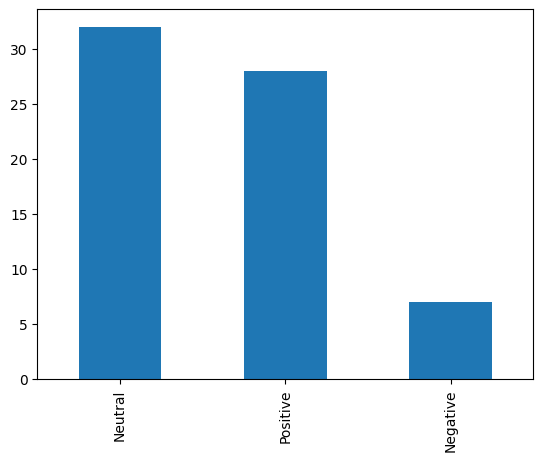

In [85]:
tweet_data['sentiment'].value_counts().plot.bar()

References

https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/api-reference/get-search-tweets